In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import linalg

## Load and split the dataset

In [2]:
data = load_svmlight_file('dataset/housing_scale', n_features=13)
X_train, X_val, y_train, y_val = train_test_split(data[0], data[1], test_size=0.2, random_state=666)

## Create the linear regression model

$ y = wx $

## Loss functions

$ L2Loss(\hat{y}, y) = \sum{(\hat{y}_i-y_i)^2} $

$ L1Loss(\hat{y}, y) = \sum{|\hat{y}_i-y|} $

In [3]:
def L2Loss(y, y_):
    return ((y-y_)**2)

def L1Loss(y, y_):
    return np.abs(y-y_)

Loss = L1Loss

## Calculate loss initially on validation dataset

In [4]:
w = np.random.normal(size=(13))
pred_init = X_train.dot(w)
loss_init = Loss(pred_init, y_train)
print('mean(loss) = {}'.format(loss_init.mean()))

mean(loss) = 22.068069864686432


## Get the close-form solution

$ w = (x^Tx)^{-1}x^Ty $

In [5]:
w = linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print(w)

[-12.89846168   2.11697736  -0.16889706   0.37318817  -5.83812818
   9.66599555   0.86771473 -11.03211998   4.38671459  -2.86453302
  -4.72490141   2.63947781 -10.13965855]


## Calculate loss on training dataset

In [6]:
pred_train = X_train.dot(w)
loss_train = Loss(pred_train, y_train)
print('mean(loss_train) = {}'.format(loss_train.mean()))

mean(loss_train) = 3.5247284589640935


## Calculate loss on validation dataset

In [7]:
pred_val = X_val.dot(w)
loss_val = Loss(pred_val, y_val).mean()
print('mean(loss_val) = {}'.format(loss_val.mean()))

mean(loss_val) = 3.7283969431011372


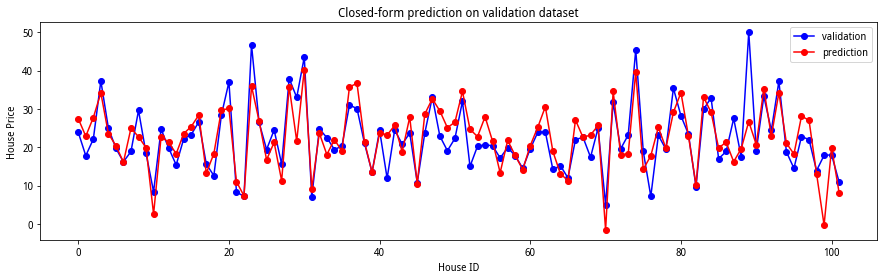

In [13]:
plt.figure(figsize=[15,4])
plt.title('Closed-form prediction on validation dataset')
plt.xlabel('House ID')
plt.ylabel('House Price')
plt.plot(y_val, marker='o', c='b', label='validation')
plt.plot(pred_val, marker='o', c='r', label='prediction')
plt.legend()
plt.show()